<div dir=rtl align=center>

# بسمه تعالی

</div>
<div dir=rtl >

### نویسنده: محمدعلی مولائی
</div>

<div dir=rtl>
<font size=5px>

در این قسمت کتابخانه های مورد نیاز فراخوانی می شوند.
</br>
باید کتابخانه
`opencv-python`
نصب شود.
با استفاده از کد:
`pip install opencv-python`

</div>


In [3]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

<div dir=rtl>
<font size=5px>

در این قسمت با استفاده از کتابخانه
`zipfile`
فایل های موجود در
zip
استخراج می شوند.
و با استفاده از کتابخانه
`opencv`
فایل که به فرمت رشته ای از بایت است به آرایه هایی از پیکسل دیکود می شوند.
</div>

In [4]:
faces = {}
with zipfile.ZipFile("./attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

<div dir=rtl>
<font size=5px>
در این قسمت
16
عکس آخر دیکشنری را نمایش می دهد.
</div>

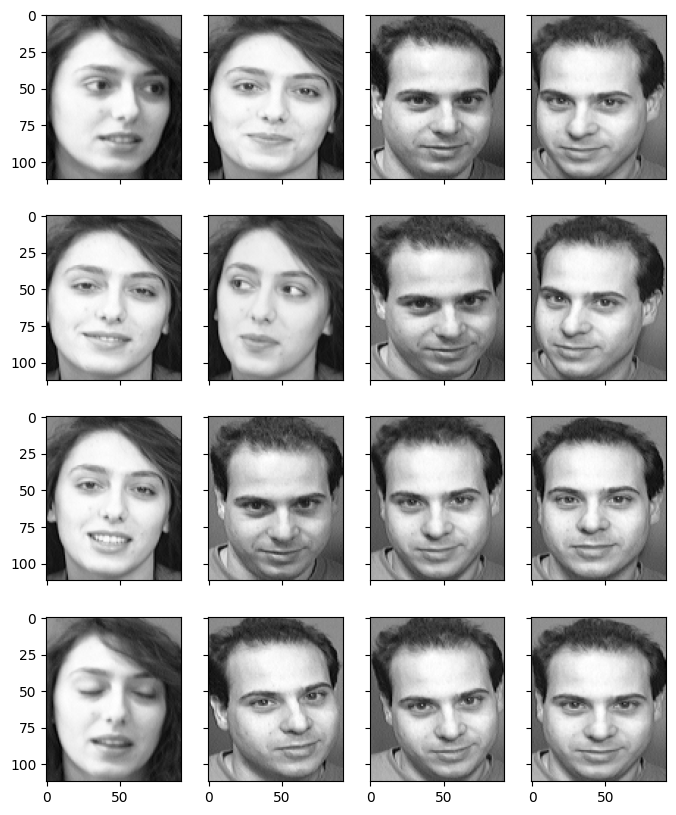

In [5]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

<div dir=rtl>
<font size=5px>
در این قسمت اندازه یا 'تعداد' پیکسل های هر تصویر نمایش داده می شود.
</div>

In [6]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)


Face image shape: (112, 92)


<div dir=rtl>
<font size=5px>
در این قسمت نام
5
عدد از عکس ها نمایش داده می شود
که مرتبط با نفر اول از آن 40 نفر است.
</div>

In [7]:
...
print(list(faces.keys())[:5])


['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm']


<div dir=rtl>
<font size=5px>

با استفاده از متد
`split`
نام
40
نفر جدا می شود و در ادامه تعداد کل عکس ها و تعداد اشخاص در قالب
class
نمایش داده می شود.
</div>

In [8]:
...
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Number of classes: 40
Number of pictures: 400


<div dir=rtl>
<font size=5px>

همه عکس ها را برای ساختن
`eiegenface`
استفاده می کند، به جزء عکس آخر نفر 39ام به عنوان
"s39/10.pgm"
و همه 10 عکس نفر 40ام.
</div>

In [9]:
...
# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)

<div dir=rtl>
<font size=5px>

حال در این قسمت روش
`PCA`
را روی داده ها اعمال می کنیم.
</div>

In [10]:
...
# Apply PCA to extract eigenfaces
pca = PCA().fit(facematrix)

<div dir=rtl>
<font size=5px>

حالا با نمایش نسبت واریانس هر مولفه ی
`PCA`
می توان نشان داد که اعداد چه قدر منحصر به فرد و معنادار هستند.
</div>

In [11]:
...
print(pca.explained_variance_ratio_)

[1.77824822e-01 1.29057925e-01 6.67093882e-02 5.63561346e-02
 5.13040312e-02 3.39156477e-02 2.47893586e-02 2.27967054e-02
 1.95632067e-02 1.82678428e-02 1.45655853e-02 1.38626271e-02
 1.13318896e-02 1.07267786e-02 9.68365599e-03 9.17860717e-03
 8.60995215e-03 8.21053028e-03 7.36580634e-03 7.01112888e-03
 6.69450840e-03 6.40327943e-03 5.98295099e-03 5.49298705e-03
 5.36083980e-03 4.99408106e-03 4.84854321e-03 4.77687371e-03
 4.50099203e-03 4.35061143e-03 4.27684434e-03 4.05463914e-03
 3.96785012e-03 3.83241704e-03 3.69966355e-03 3.56356652e-03
 3.41269732e-03 3.33215240e-03 3.17642634e-03 3.03400142e-03
 2.97464206e-03 2.91054493e-03 2.86082016e-03 2.78052126e-03
 2.69873388e-03 2.60122139e-03 2.56106677e-03 2.50435737e-03
 2.44154438e-03 2.35425118e-03 2.31772334e-03 2.20335201e-03
 2.18249599e-03 2.16369451e-03 2.11113501e-03 2.05410950e-03
 2.00521036e-03 1.97423272e-03 1.95619744e-03 1.92361114e-03
 1.88146543e-03 1.81655157e-03 1.74212750e-03 1.70581678e-03
 1.66405571e-03 1.635671

<div dir=rtl>
<font size=5px>

برای بدست آوردن
`eigenface`
، یک تعداد مشخص و متوسط از تعداد مولفه های
`PCA`
انتخاب می کنیم.
خودش عدد 50 را انتخاب کرده.
</div>
<div dir=rtl>
<font size=5px>

سپس با استفاده از مولفه های
`PCA`
گفته شده،
`eigenface`
ها
را استخراج می کنیم.
16
`eigenface`
اول را نمایش داده است.
</div>

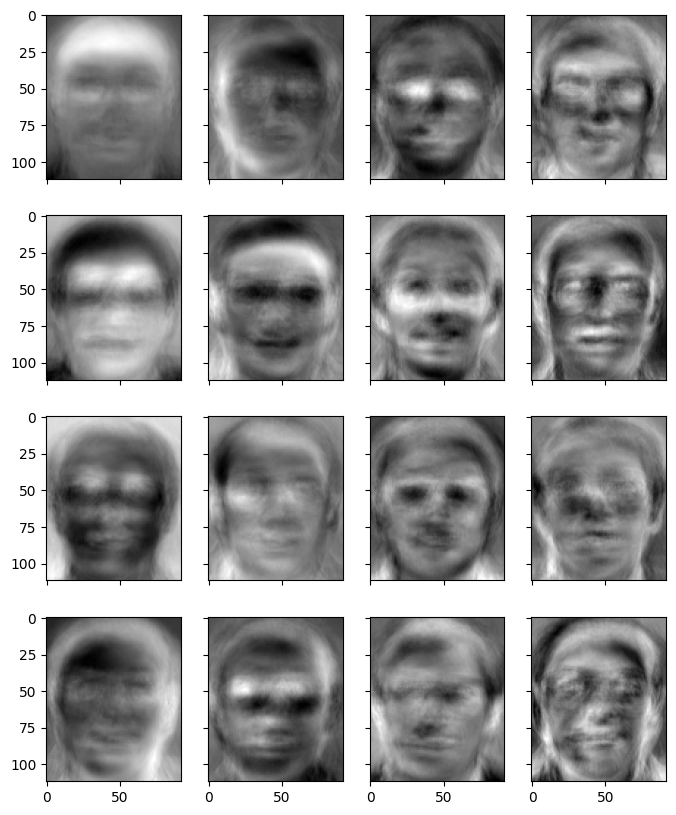

In [12]:
...
# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()

<div dir=rtl>
<font size=5px>

در این قسمت بردار وزنی برای هر
`eigenface`
را با استفاده از فرمول و ماتریس مربوطه محاسبه کرده است.
</div>

In [13]:
...
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T

<div dir=rtl>
<font size=5px>
در این قسمت، کد یک خطی بالا که در آن از ضرب ماتریسی استفاده کرده را در حلقه پایین تعریف کرده است.
</div>

In [14]:
...
weights = []
for i in range(facematrix.shape[0]):
    weight = []
    for j in range(n_components):
        w = eigenfaces[j] @ (facematrix[i] - pca.mean_)
        weight.append(w)
    weights.append(weight)

<div dir=rtl>
<font size=5px>
در این قسمت صحت عملکرد این روش را بررسی کرده است.
در اصل بردار وزنی عکس مورد سوال را با داده های
dataset
مقایسه کرده است و عکسی را که فاصله نمودار وزنی یا
weight vector
آن با عکس مورد سوال
کمترین فاصله
L2
دارد به عنوان
Best match
یا بهترین نتیجه داده است.
</div>

Best match s39 with Euclidean distance 1559.997137


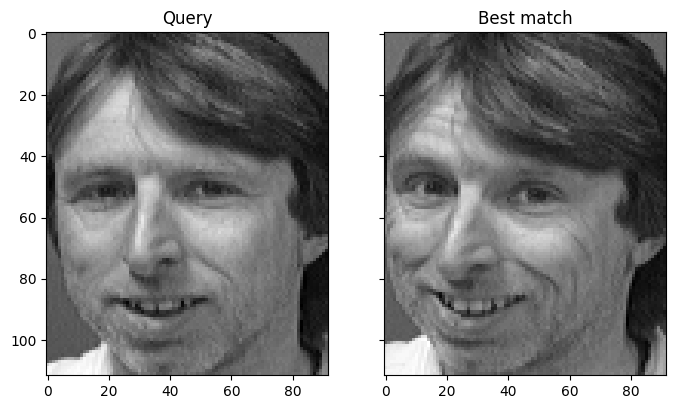

In [18]:
# Test on out-of-sample image of existing class
query = faces["s39/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

<div dir=rtl>
<font size=5px>

همانطور که گفته شد از 10 عکس نفر 40ام در آزمایش استفاده نشد و به همین دلیل هیچ
`eigenface`
ای
از این شخص در
dataset
موجود نیست، و وقتی از عکس او برای تست استفاده می شود، برنامه عکس یکی از 39 نفر دیگر را به او نسبت می دهد.
</div>
<div dir=rtl>
<font size=5px>
همانطور که مشخص است فاصله
L2
آن از فاصله
L2
 برای قسمت بالا عدد بزرگ تری است.
</div>

Best match s5 with Euclidean distance 2690.209330


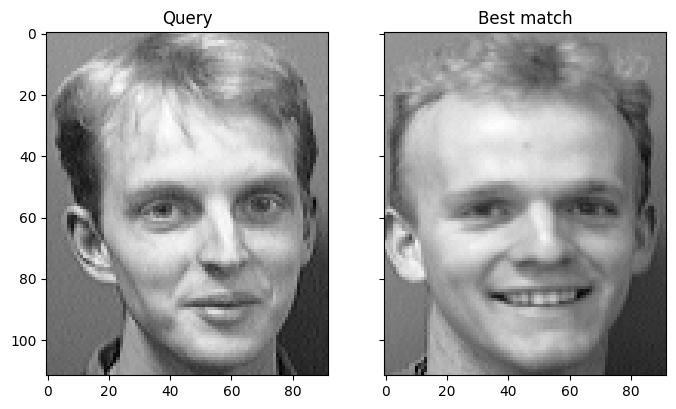

In [ ]:
...
# Test on out-of-sample image of new class
query = faces["s40/1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

<div dir=rtl>
<font size=5px>

در این قسمت با استفاده از
`eigenface`
ها
و بردارهای وزنی یک چهره تصادفی ساخته شده
که در سمت راست نمایش داده شده است و در سمت چپ چهره ی میانگین، با درنظر گرفتن نمودار وزنی میانگین را نمایش داده  است. 
</div>

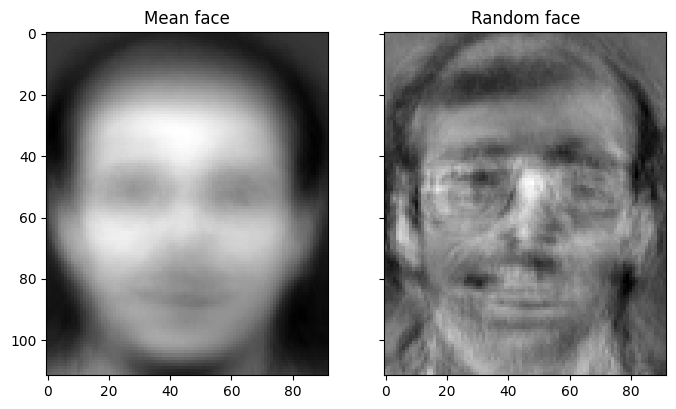

In [ ]:
...
# Visualize the mean face and random face
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(pca.mean_.reshape(faceshape), cmap="gray")
axes[0].set_title("Mean face")
random_weights = np.random.randn(n_components) * weights.std()
newface = random_weights @ eigenfaces + pca.mean_
axes[1].imshow(newface.reshape(faceshape), cmap="gray")
axes[1].set_title("Random face")
plt.show()